Decision Tree Implementation -- Rakshya Pandey (C00580017)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline


In [ ]:
train_sizes = [500, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000] 
noise_levels = [0.1, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5] 
random_state = 42

In [ ]:
def generate_data(n_samples, noise, random_state=42):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    return X, y


X_test, y_test = generate_data(1500, 0.3)  


In [ ]:
results = []
all_results = [] 

for noise in noise_levels:
    
    noise_results = []
    for size in train_sizes:
       
        X_train, y_train = generate_data(size, noise)
        
       
        clf = DecisionTreeClassifier(max_depth = 10, min_samples_split=30, min_samples_leaf=10, criterion='entropy',max_features='sqrt',class_weight='balanced',random_state=random_state)
        clf.fit(X_train, y_train)

        
        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)

        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        gap = train_acc - test_acc

        

        noise_results.append((size, train_acc, test_acc, gap))
        all_results.append({
            'noise': noise,
            'train_size': size,
            'train_acc': train_acc,
            'test_acc': test_acc,
            'gap': gap
        })
    results.append((noise, noise_results))

results_df = pd.DataFrame(all_results)
results_df

,noise,train_size,train_acc,test_acc,gap
0,0.1,500,0.974000,0.887333,0.086667
1,0.1,1000,0.997000,0.897333,0.099667
2,0.1,2000,0.995000,0.886667,0.108333
3,0.1,3000,0.970333,0.869333,0.101000
4,0.1,4000,0.990750,0.876667,0.114083
...,...,...,...,...,...
67,0.5,4000,0.837500,0.870667,-0.033167
68,0.5,5000,0.837600,0.877333,-0.039733
69,0.5,6000,0.838333,0.860000,-0.021667
70,0.5,7000,0.839143,0.876667,-0.037524


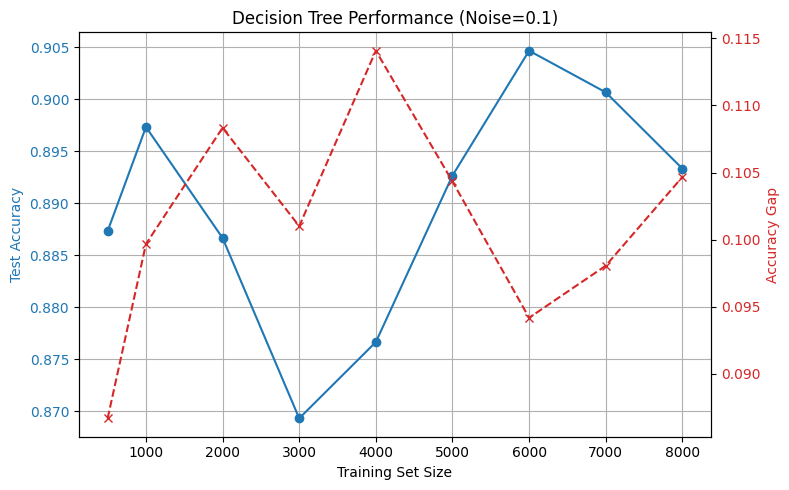

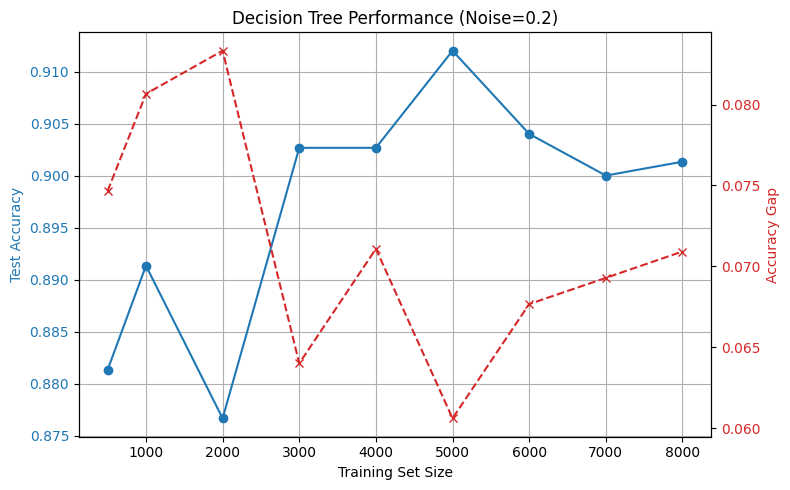

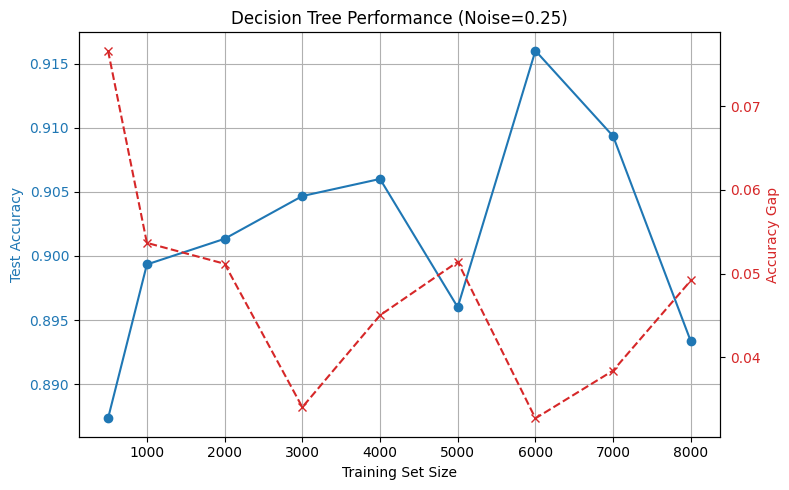

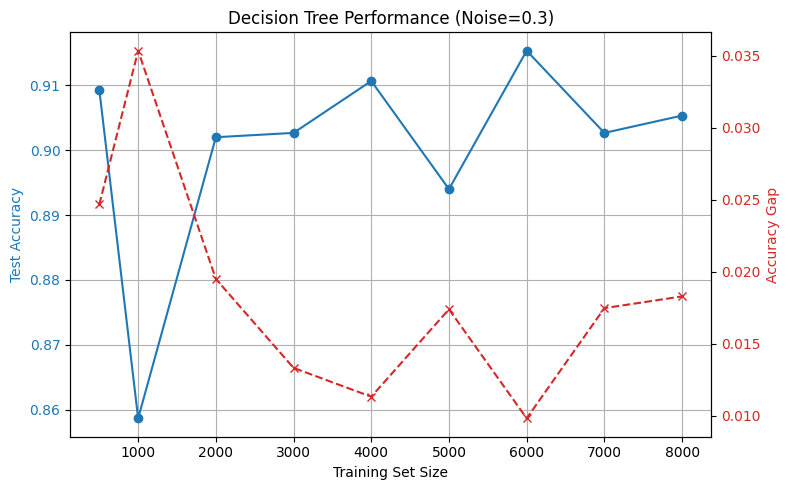

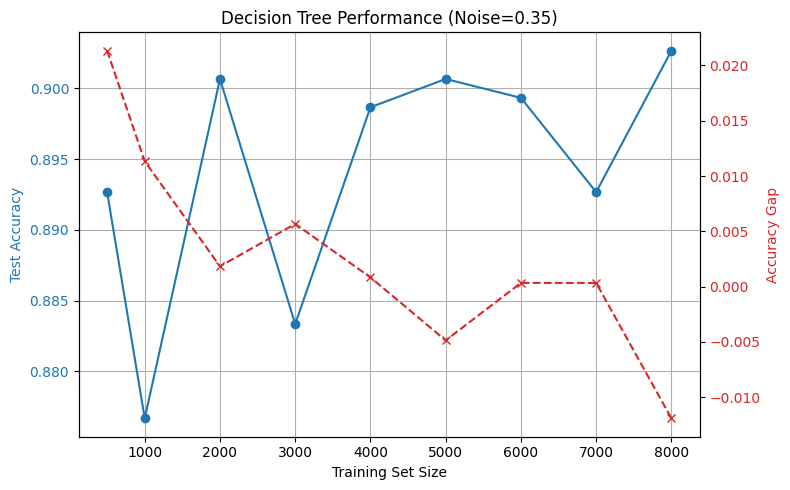

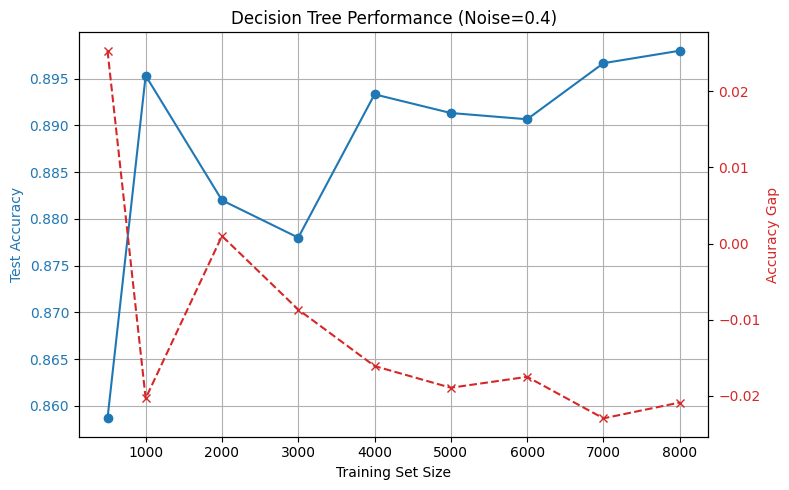

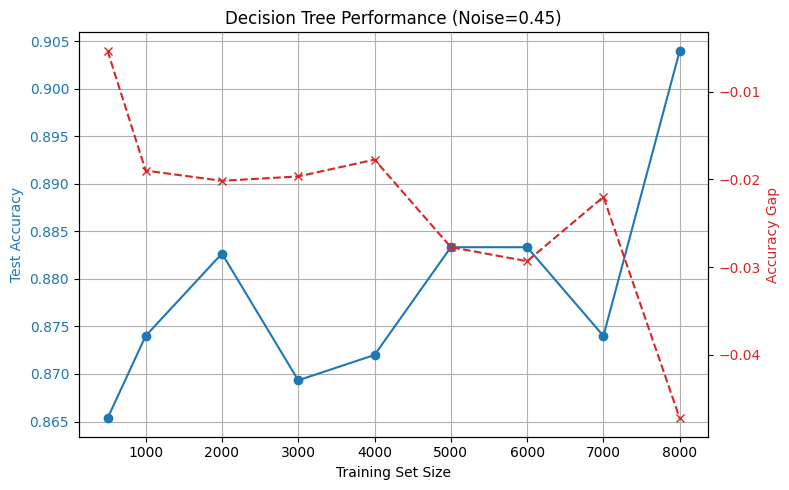

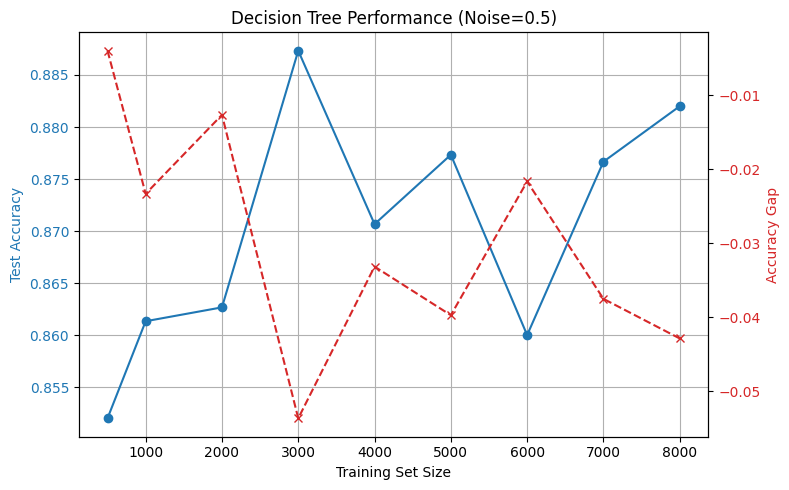

In [5]:
for noise, noise_results in results:
    sizes = [r[0] for r in noise_results]
    test_accuracies = [r[2] for r in noise_results]
    gaps = [r[3] for r in noise_results]

    fig, ax1 = plt.subplots(figsize=(8, 5))

    color = 'tab:blue'
    ax1.set_xlabel('Training Set Size')
    ax1.set_ylabel('Test Accuracy', color=color)
    ax1.plot(sizes, test_accuracies, marker='o', color=color, label='Test Accuracy')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.grid(True)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:red'
    ax2.set_ylabel('Accuracy Gap', color=color)
    ax2.plot(sizes, gaps, marker='x', linestyle='--', color=color, label='Accuracy Gap')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title(f'Decision Tree Performance (Noise={noise})')
    fig.tight_layout()
    plt.show()

Targets: [ 500 1000 2000 3000 4000 5000 6000 7000 8000  500 1000 2000 3000 4000
 5000 6000 7000 8000  500 1000 2000 3000 4000 5000 6000 7000 8000  500
 1000 2000 3000 4000 5000 6000 7000 8000  500 1000 2000 3000 4000 5000
 6000 7000 8000  500 1000 2000 3000 4000 5000 6000 7000 8000  500 1000
 2000 3000 4000 5000 6000 7000 8000  500 1000 2000 3000 4000 5000 6000
 7000 8000]

Fitted Linear Model: N = a*Q + b*P + c
Coefficients (a, b): [  75283.77438843  672883.11995098  -65760.78477148 -138109.53657966
   45353.52681003 -318287.71154206]
Intercept (c): -331397.5120988165
Linear R²: 0.304


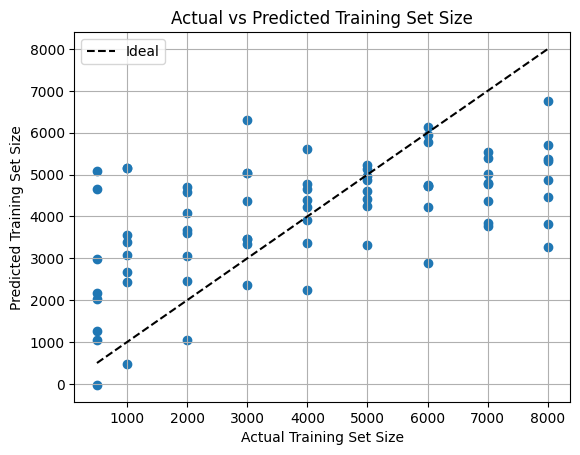

In [ ]:
# Fitting N = f(Q, P) using Linear Regression
# Preparing the dataset for regression
features = []   # (noise, test accuracy, gap, noise*test_acc, noise^2, test_acc^2)
targets = []   # training set size

for noise, noise_results in results:
    for size, train_acc, test_acc, gap in noise_results:
        features.append([
            noise,               # noise
            test_acc,             # test accuracy
            gap,                  # train-test gap
            noise * test_acc,     # interaction term
            noise ** 2,           # noise squared
            test_acc ** 2         # test accuracy squared
            ])
        targets.append(size)

features = np.array(features)
targets = np.array(targets)

# print(features)
print("Targets:", targets)

# Linear Regression
reg = LinearRegression()
reg.fit(features, targets)

print("\nFitted Linear Model: N = a*Q + b*P + c")
print(f"Coefficients (a, b): {reg.coef_}")
print(f"Intercept (c): {reg.intercept_}")
r2_linear = reg.score(features, targets)
print(f"Linear R²: {r2_linear:.3f}")


# Predict and compare
predicted_sizes = reg.predict(features)

plt.figure()
plt.scatter(targets, predicted_sizes, marker='o')
plt.plot([min(targets), max(targets)], [min(targets), max(targets)], 'k--', label='Ideal')
plt.xlabel('Actual Training Set Size')
plt.ylabel('Predicted Training Set Size')
plt.title('Actual vs Predicted Training Set Size')
plt.grid(True)
plt.legend()
plt.show()


Polynomial degree 2 R²: 0.456
Polynomial degree 3 R²: 0.745


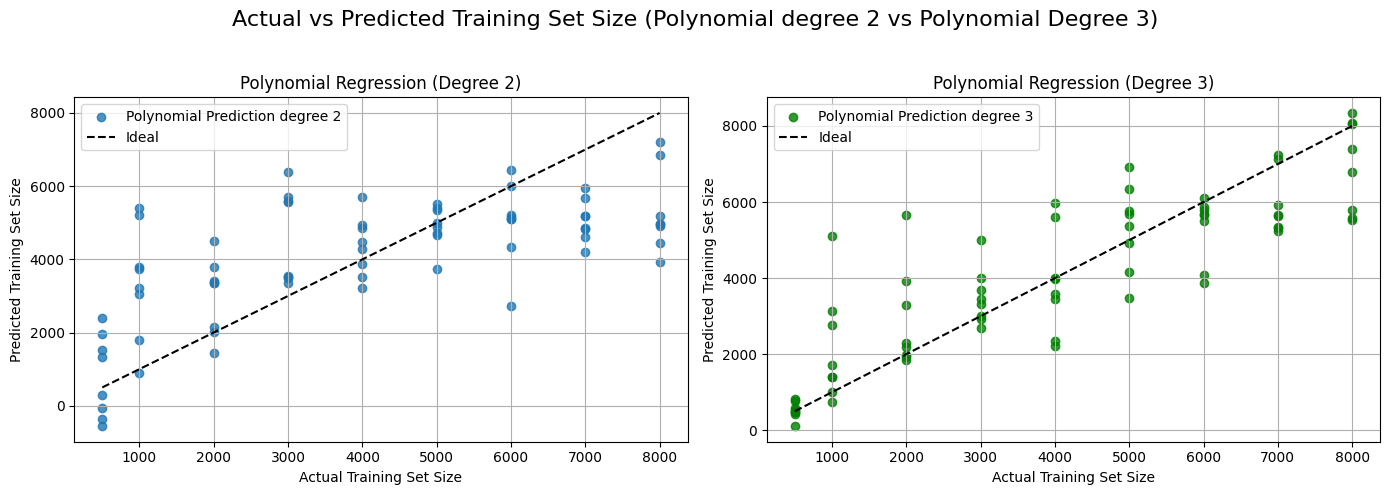

In [7]:
poly_model2 = make_pipeline(
    PolynomialFeatures(degree=2),
    LinearRegression()
)
poly_model2.fit(features, targets)
predicted_poly2 = poly_model2.predict(features)

r2_poly = r2_score(targets, predicted_poly2)
print(f"Polynomial degree 2 R²: {r2_poly:.3f}")


poly_model3 = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression()
)
poly_model3.fit(features, targets)
predicted_poly3 = poly_model3.predict(features)
r2_rf = r2_score(targets, predicted_poly3)
print(f"Polynomial degree 3 R²: {r2_rf:.3f}")


fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Polynomial plot
axs[0].scatter(targets, predicted_poly2, alpha=0.8, label='Polynomial Prediction degree 2')
axs[0].plot([min(targets), max(targets)], [min(targets), max(targets)], 'k--', label='Ideal')
axs[0].set_xlabel('Actual Training Set Size')
axs[0].set_ylabel('Predicted Training Set Size')
axs[0].set_title('Polynomial Regression (Degree 2)')
axs[0].legend()
axs[0].grid(True)

# Random Forest plot
axs[1].scatter(targets, predicted_poly3, alpha=0.8, color='green', label='Polynomial Prediction degree 3')
axs[1].plot([min(targets), max(targets)], [min(targets), max(targets)], 'k--', label='Ideal')
axs[1].set_xlabel('Actual Training Set Size')
axs[1].set_ylabel('Predicted Training Set Size')
axs[1].set_title('Polynomial Regression (Degree 3)')
axs[1].legend()
axs[1].grid(True)

plt.suptitle('Actual vs Predicted Training Set Size (Polynomial degree 2 vs Polynomial Degree 3)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
